In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import ParameterGrid

from tqdm.notebook import tqdm

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Carnegie Mellon University/15-688 Practical Data Science/Cleaned tables/merged.csv')
merged_df.head()

,State_Abbr,State,Year,HPI,num_crimes,Female_per_male,num_asians_per_km2,Percent HS or higher,Percent Bach or higher,Norm_poor,1,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+
0,CA,California,1997,422.33,160,1.004704,15,80.7,27.5,338.938144,0.015278,0.066190,0.082786,0.073945,0.069182,0.066392,0.080371,0.086400,0.085759,0.076659,0.065129,0.053048,0.039099,0.032330,0.031009,0.027725,0.022444,0.014473,0.011779
1,CA,California,1996,411.04,153,1.003608,15,79.8,26.8,333.041237,0.015973,0.069498,0.081588,0.074486,0.067713,0.066404,0.081954,0.088977,0.085919,0.075208,0.065381,0.048843,0.038080,0.032176,0.031768,0.028345,0.021842,0.014328,0.011519
2,CA,California,1995,411.40,142,1.002516,15,79.6,24.2,330.463918,0.016686,0.071814,0.078687,0.073602,0.065991,0.068845,0.083676,0.091844,0.086011,0.074288,0.062936,0.048160,0.037492,0.032645,0.032042,0.028801,0.021190,0.014035,0.011254
3,CA,California,1998,456.42,135,1.004670,15,80.1,26.4,343.216495,0.014793,0.063105,0.082796,0.073790,0.070743,0.067104,0.078752,0.083621,0.085427,0.077886,0.066335,0.054959,0.041014,0.032967,0.030287,0.027272,0.022656,0.014502,0.011990
4,CA,California,1999,487.38,126,1.006055,15,80.4,27.1,347.474227,0.014497,0.060494,0.082058,0.074566,0.071737,0.068753,0.076539,0.081034,0.084491,0.078564,0.067733,0.057324,0.042267,0.033647,0.029422,0.026938,0.022887,0.014715,0.012337


In [ ]:
X = merged_df.drop([
                    'State_Abbr',
                    'State',
                    'Year',
                    'num_crimes'
], axis=1).copy()
y = merged_df['num_crimes'].copy()
print(X.shape, y.shape)

(1479, 25) (1479,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1035, 25) (444, 25) (1035,) (444,)


In [ ]:
model_list = [
              LinearRegression(),
              Ridge(random_state=42),
              KNeighborsRegressor(),
              SVR(),
              RandomForestRegressor(random_state=42),
              GradientBoostingRegressor(random_state=42),
              ExtraTreesRegressor(random_state=42),
              MLPRegressor(random_state=42, max_iter=20000, early_stopping=True)
]
model_names = [
               'Linear Regression',
               'Ridge Regression',
               'KNN',
               'SVR',
               'Random Forest',
               'Gradient Boosting',
               'Extra Trees',
               'MLP'
]

In [ ]:
results_df = pd.DataFrame(columns=['model','r2_score'])
for i,model in tqdm(enumerate(model_list)):
  model.fit(X_train, y_train)
  model_results = {
      'model':model_names[i],
      'r2_score':model.score(X_test, y_test)
  }
  results_df = results_df.append(model_results, ignore_index=True)
results_df

,model,r2_score
0,Linear Regression,-0.071643
1,Ridge Regression,-0.019623
2,KNN,0.103936
3,SVR,-0.006048
4,Random Forest,0.748508
5,Gradient Boosting,0.687647
6,Extra Trees,0.769190
7,MLP,0.001032


In [ ]:
def grid_search(reg, params, X_train, X_test, y_train, y_test):
  best_params = None
  best_score = 0
  for param in tqdm(params):
    model = reg().set_params(**param).fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score >= best_score:
      best_score = score
      best_params = param
  print('Best score:', best_score)
  print('Best params:', best_params)
  return best_params

In [ ]:
rf_params = {
    'n_estimators': [100,150,200],
    'max_depth': [None, 5,7,9],
    'max_features': ['auto','sqrt','log2'],
    'random_state': [42]
}
rf_params = ParameterGrid(rf_params)
rf_best = grid_search(RandomForestRegressor, rf_params, X_train, X_test, y_train, y_test)


Best score: 0.749845142190733
Best params: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 150, 'random_state': 42}


In [ ]:
gb_params = {
    'n_estimators': [100,150,200],
    'max_depth': [None, 5,7,9],
    'max_features': ['auto','sqrt','log2'],
    'random_state': [42]
}
gb_params = ParameterGrid(gb_params)
gb_best = grid_search(GradientBoostingRegressor, gb_params, X_train, X_test, y_train, y_test)


Best score: 0.735036205997522
Best params: {'max_depth': 7, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}


In [ ]:
et_params = {
    'n_estimators': [100,150,200],
    'max_depth': [None, 5,7,9],
    'max_features': ['auto','sqrt','log2'],
    'random_state': [42]
}
et_params = ParameterGrid(et_params)
et_best = grid_search(ExtraTreesRegressor, et_params, X_train, X_test, y_train, y_test)


Best score: 0.7729759346583902
Best params: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 150, 'random_state': 42}


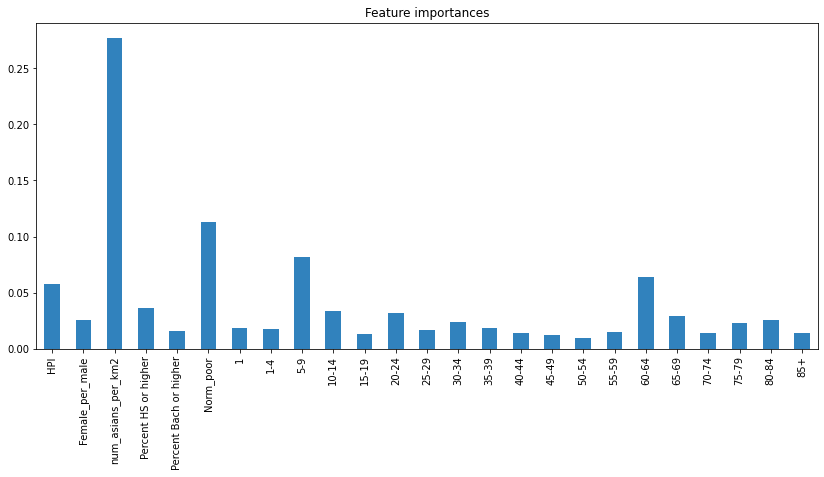

In [ ]:
et = ExtraTreesRegressor().set_params(**et_best).fit(X, y)
feat_imp = pd.Series(data=et.feature_importances_, index=X.columns)
feat_imp.plot(kind='bar', colormap='tab20c', figsize=(14,6), title='Feature importances');